In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
THIS CODE GENERATES A MODIFIED VERSION OF THE ORIGINAL CSV DATASET THAT
INCLUDES A COLUMN FOR 'original_sample' WHICH LISTS THE AUDIO SAMPLE
THAT THE 1 SECOND SEGMENT ORIGINATES FROM
"""
import os
import librosa
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

# Function to extract features from an audio file
def extract_features(file_path, segment_length, file_name):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path)
        # Calculate the number of segments based on the segment length and audio length
        num_segments = int(np.ceil(len(y) / float(segment_length * sr)))

        # Initialize a list to store the features for this file
        features = []

        # Extract features for each segment
        for i in range(num_segments):
            # Calculate start and end frame for the current segment
            start_frame = i * segment_length * sr
            end_frame = min(len(y), (i + 1) * segment_length * sr)

            # Extract audio for this segment
            y_segment = y[start_frame:end_frame]

            # Extract features
            chroma_stft = np.mean(librosa.feature.chroma_stft(y=y_segment, sr=sr))
            rms = np.mean(librosa.feature.rms(y=y_segment))
            spec_cent = np.mean(librosa.feature.spectral_centroid(y=y_segment, sr=sr))
            spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y_segment, sr=sr))
            rolloff = np.mean(librosa.feature.spectral_rolloff(y=y_segment, sr=sr))
            zcr = np.mean(librosa.feature.zero_crossing_rate(y_segment))
            mfccs = librosa.feature.mfcc(y=y_segment, sr=sr)
            mfccs_mean = np.mean(mfccs, axis=1)

            # Append the extracted features to the list
            features.append([chroma_stft, rms, spec_cent, spec_bw, rolloff, zcr, *mfccs_mean, file_name])

        return features
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Function to create the dataset for a specific label
def create_label_dataset(audio_dir, label, segment_length, num_files):
    feature_list = []

    # Wrap the files iterable with tqdm to show the progress bar
    label_files = os.listdir(os.path.join(audio_dir, label))[:num_files]
    for file in tqdm(label_files, desc=f"{label} Files Progress"):
        file_path = os.path.join(audio_dir, label, file)
        # Extract the file name without the extension
        file_name = os.path.splitext(file)[0]
        # Extract features for the current file
        file_features = extract_features(file_path, segment_length, file_name)
        if file_features:
            # Append features of all segments along with the label to the dataset
            for segment_features in file_features:
                feature_list.append(segment_features + [label])

    return feature_list

# Directory where the 'FAKE' and 'REAL' folders are located
audio_dir = '/content/drive/MyDrive/newdata/'

# Length of the audio segments in seconds
segment_length = 5  # for example, 5 seconds

# Number of files to process for each label
num_files_per_label = 261 # Adjust this number based on your requirement

# Create the dataset for 'fake' label
fake_data = create_label_dataset(audio_dir, 'fake', segment_length, num_files_per_label)

# Create the dataset for 'real' label
real_data = create_label_dataset(audio_dir, 'real', segment_length, num_files_per_label)

# Combine the datasets
feature_list_combined = fake_data + real_data

# Create a DataFrame with the combined dataset
df = pd.DataFrame(feature_list_combined, columns=['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'origin_sample', 'LABEL'])

# Save the dataset to a CSV file
csv_output_path = 'audio_features_new.csv'
df.to_csv(csv_output_path, index=False)

print(f'Dataset created and saved to {csv_output_path}')



fake Files Progress:   0%|          | 0/261 [00:00<?, ?it/s]

real Files Progress:   0%|          | 0/261 [00:00<?, ?it/s]

Dataset created and saved to audio_features_new.csv


In [ ]:
import pandas as pd

# Replace these with the actual paths to your CSV files
csv_file1_path = "/content/audio_features_373.csv"
csv_file2_path = "/content/audio_features_new.csv"

# Read CSV files into pandas DataFrames
df1 = pd.read_csv(csv_file1_path)
df2 = pd.read_csv(csv_file2_path)

# Concatenate (add) df1 to df2 along rows
concatenated_df = pd.concat([df2, df1], ignore_index=True)

# Check the shape of the concatenated DataFrame
print("Shape of the concatenated DataFrame:", concatenated_df.shape)

# Save the concatenated DataFrame to a new CSV file
concatenated_csv_path = "concatenatedfile.csv"
concatenated_df.to_csv(concatenated_csv_path, index=False)

print(f'Concatenated data saved to {concatenated_csv_path}')


Shape of the concatenated DataFrame: (2256, 28)
Concatenated data saved to concatenatedfile.csv


In [ ]:
import pandas as pd


df = pd.read_csv("/content/concatenatedfile.csv")
df

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,origin_sample,LABEL
0,0.546381,0.004967,2814.074214,2291.094684,5425.918579,0.214272,-648.14136,64.974570,-6.935996,15.784600,...,-5.765353,-4.917935,-1.366535,-5.438657,-1.072017,-3.153103,-3.265171,-3.388779,voice_2734,fake
1,0.623621,0.000047,3422.433014,2763.370655,6764.696648,0.271892,-780.84283,54.052790,-12.853299,15.003856,...,-3.810038,-2.485654,-3.380385,-3.589076,-3.201577,-2.184932,-4.495385,-1.198365,voice_2734,fake
2,0.434236,0.044983,1179.607703,1202.477913,2085.430908,0.062421,-430.59490,143.113700,24.993520,1.042048,...,6.959461,7.547199,6.228020,2.457666,0.838002,0.016677,-2.673374,-2.782866,voice_3074,fake
3,0.644807,0.000489,1546.277243,1880.477192,2994.191895,0.039648,-679.79770,132.669270,-44.170593,23.658440,...,-0.067879,3.446101,10.185781,5.040848,7.051660,-0.785642,8.985005,-3.638687,voice_3074,fake
4,0.531919,0.004125,2860.444424,2167.794936,5124.451049,0.249939,-613.09440,94.831110,-19.864580,11.205709,...,-13.921515,-5.834702,2.464403,-6.435221,-6.793045,-0.791949,-5.604424,1.811389,voice_8941,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,0.336932,0.031378,2249.246785,2091.622231,4093.053182,0.111708,-281.29672,84.407520,-52.982105,-1.617856,...,-9.795494,-4.201562,-8.229948,0.954784,-7.474070,-2.816211,-5.411491,-4.477701,trump-original-50,real
2252,0.315772,0.040317,2150.346572,2256.275771,4003.879801,0.101599,-287.42078,94.639710,-5.201880,15.380642,...,-7.699153,-1.913410,-8.270205,-2.088639,-10.469984,-1.476050,-4.937090,-3.479387,trump-original-51,real
2253,0.368202,0.032805,2353.298812,2288.070728,4391.577148,0.132100,-314.28943,94.652725,1.088181,3.425673,...,-8.822428,0.591631,-6.311223,0.561294,-7.934109,-4.146299,-6.301251,-1.223028,trump-original-51,real
2254,0.330429,0.034362,2088.552624,2027.405942,3703.262329,0.095857,-268.62700,94.080475,-47.406740,2.413169,...,-8.651910,-0.065854,-4.296780,-1.262579,-8.960758,-4.108007,-6.008332,-6.306722,trump-original-53,real


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib  # Use joblib to save the model

# Load your dataset (assuming it's in a CSV file)
dataset_path = "/content/concatenatedfile.csv"
df = pd.read_csv(dataset_path)

# Extract features and labels
X = df.drop(['LABEL', 'origin_sample'], axis=1)  # Assuming you want to exclude 'origin_sample' and 'LABEL'
Y = df['LABEL']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train an SVM model
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, Y_train)

# Save the trained model using joblib
model_save_path = "model.pkl"
joblib.dump(model, model_save_path)
print(f"Model saved at {model_save_path}")

# Make predictions on the testing set
predictions = model.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(Y_train, predictions)
print(f"Accuracy on the train set: {accuracy}")
# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy on the testing set: {accuracy}")


Model saved at model.pkl
Accuracy on the train set: 0.8054323725055432
Accuracy on the testing set: 0.8053097345132744


In [ ]:
X_train.shape

(1804, 26)

In [ ]:
import librosa
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import joblib  # Use joblib to save the model
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Function to extract features from an audio file
def extract_features(file_path, segment_length):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path)
        # Calculate the number of segments based on the segment length and audio length
        num_segments = int(np.ceil(len(y) / float(segment_length * sr)))

        # Initialize a list to store the features for this file
        features = []

        # Extract features for each segment
        for i in range(num_segments):
            # Calculate start and end frame for the current segment
            start_frame = i * segment_length * sr
            end_frame = min(len(y), (i + 1) * segment_length * sr)

            # Extract audio for this segment
            y_segment = y[start_frame:end_frame]

            # Extract features
            chroma_stft = np.mean(librosa.feature.chroma_stft(y=y_segment, sr=sr))
            rms = np.mean(librosa.feature.rms(y=y_segment))
            spec_cent = np.mean(librosa.feature.spectral_centroid(y=y_segment, sr=sr))
            spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y_segment, sr=sr))
            rolloff = np.mean(librosa.feature.spectral_rolloff(y=y_segment, sr=sr))
            zcr = np.mean(librosa.feature.zero_crossing_rate(y_segment))
            mfccs = librosa.feature.mfcc(y=y_segment, sr=sr)
            mfccs_mean = np.mean(mfccs, axis=1)

            # Append the extracted features to the list
            features.append([chroma_stft, rms, spec_cent, spec_bw, rolloff, zcr, *mfccs_mean])

        return features
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Load the trained SVM model
model_path = "/content/model.pkl"
model = joblib.load(model_path)

# Path to your new WAV audio file
new_audio_path = "/content/Recording (5).m4a"

# Set the segment length for feature extraction
segment_length = 10  # specify the segment length in seconds

# Extract features from the new audio file
new_features = extract_features(new_audio_path, segment_length)

# Check if features were extracted successfully
if new_features:
    # Convert the features to a DataFrame
    new_features_df = pd.DataFrame(new_features)

    # Make predictions using the trained model
    new_prediction = model.predict(new_features_df)
    print(f"Prediction for the new data: {new_prediction}")
else:
    print("Feature extraction failed.")


Prediction for the new data: ['real']


In [ ]:
import librosa
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import joblib  # Use joblib to save the model
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Function to extract features from an audio file
def extract_features(file_path, segment_length):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path)
        # Calculate the number of segments based on the segment length and audio length
        num_segments = int(np.ceil(len(y) / float(segment_length * sr)))

        # Initialize a list to store the features for this file
        features = []

        # Extract features for each segment
        for i in range(num_segments):
            # Calculate start and end frame for the current segment
            start_frame = i * segment_length * sr
            end_frame = min(len(y), (i + 1) * segment_length * sr)

            # Extract audio for this segment
            y_segment = y[start_frame:end_frame]

            # Extract features
            chroma_stft = np.mean(librosa.feature.chroma_stft(y=y_segment, sr=sr))
            rms = np.mean(librosa.feature.rms(y=y_segment))
            spec_cent = np.mean(librosa.feature.spectral_centroid(y=y_segment, sr=sr))
            spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y_segment, sr=sr))
            rolloff = np.mean(librosa.feature.spectral_rolloff(y=y_segment, sr=sr))
            zcr = np.mean(librosa.feature.zero_crossing_rate(y_segment))
            mfccs = librosa.feature.mfcc(y=y_segment, sr=sr)
            mfccs_mean = np.mean(mfccs, axis=1)

            # Append the extracted features to the list
            features.append([chroma_stft, rms, spec_cent, spec_bw, rolloff, zcr, *mfccs_mean])

        return features
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Load the trained SVM model
model_path = "/content/model.pkl"
model = joblib.load(model_path)

# Path to your new WAV audio file
new_audio_path = "/content/Demo+Clip-bfbc7f53-b845-4e78-a999-1d2b5fe1bf71.wav"

# Set the segment length for feature extraction
segment_length = 10  # specify the segment length in seconds

# Extract features from the new audio file
new_features = extract_features(new_audio_path, segment_length)

# Check if features were extracted successfully
if new_features:
    # Convert the features to a DataFrame
    new_features_df = pd.DataFrame(new_features)

    # Make predictions using the trained model
    new_prediction = model.predict(new_features_df)
    print(f"Prediction for the new data: {new_prediction}")
else:
    print("Feature extraction failed.")

Prediction for the new data: ['fake']


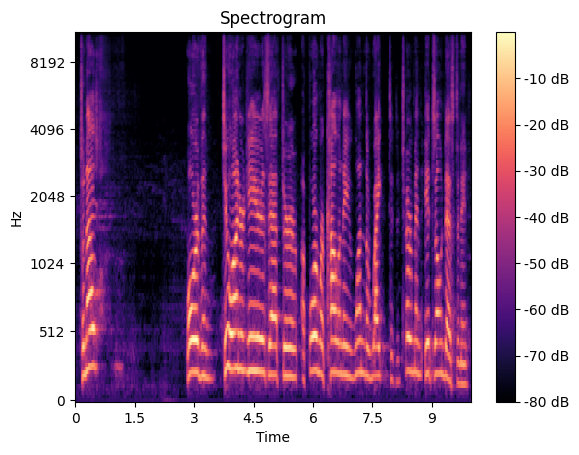

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
file_path = "/content/drive/MyDrive/data/fake/Obama-to-Biden-1.wav"
y, sr = librosa.load(file_path)

# Generate a spectrogram
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert to decibels (dB)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Plot the spectrogram
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


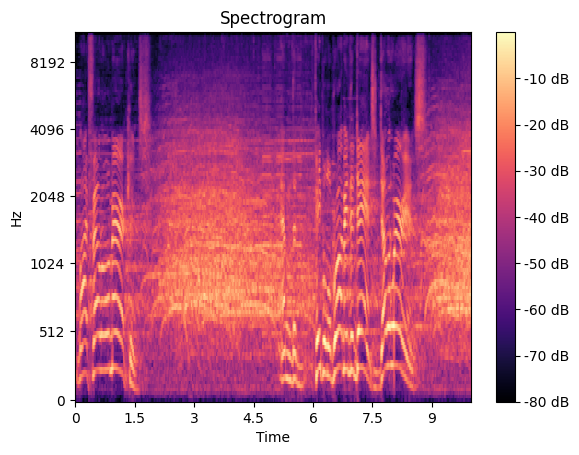

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file t-sne
file_path = "/content/drive/MyDrive/data/real/biden-original-1.wav"
y, sr = librosa.load(file_path)

# Generate a spectrogram
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert to decibels (dB)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Plot the spectrogram
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()